# Simulators

In [4]:
from qiskit import BasicAer

backend1 = BasicAer.get_backend('statevector_simulator')
backend2 = BasicAer.get_backend('unitary_simulator')
backend3 = BasicAer.get_backend('qasm_simulator')

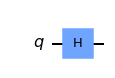

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

### 1. Statevector Simulator


{'0': 0.5, '1': 0.5}


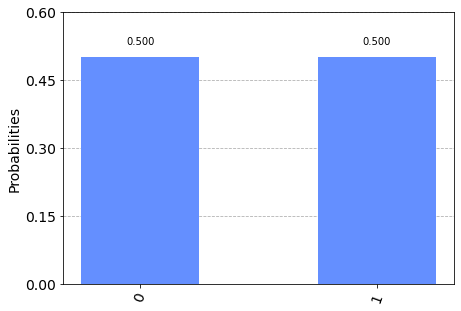

In [3]:
from qiskit import execute
from qiskit.visualization import plot_histogram
job = execute(qc, backend1)
result = job.result()
count = result.get_counts()
print(count)
plot_histogram(count) 

The histogram plots theoretical values of probability

In [4]:
# returns the output statevector
result.get_statevector()
# you can use save_statevector() to save the state

array([0.70710678+0.j, 0.70710678+0.j])

### 2. Unitary Simulator

In [5]:
# error shown on purpose
from qiskit import execute
from qiskit.visualization import plot_histogram

job = execute(qc, backend2)
result = job.result()
count = result.get_counts()
print(count)
plot_histogram(count)

QiskitError: 'No counts for experiment "0"'

<b>Unitary Simulator doesn't give counts or plot histogram</b>

But it does give the effective operator of the circuit, in this case Hadamard Gate.

In [7]:
result.get_unitary()

array([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
       [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]])

### 3. Qasm Simulator

In [8]:
job = execute(qc, backend3)
result = job.result()
count = result.get_counts()

No classical registers in circuit "circuit-0", counts will be empty.


Doesn't give a result without explicitly measuring the circuit

{'1': 508, '0': 516}


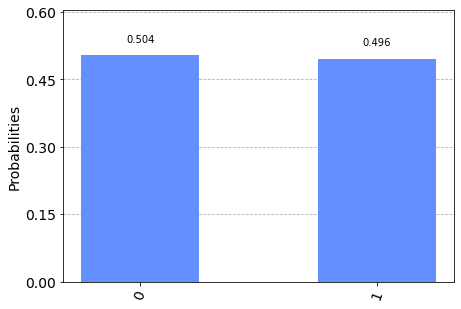

In [9]:
# measure the circuit and the graph will be plotted
qc.measure_all()

job = execute(qc, backend3)
result = job.result()
count = result.get_counts()
print(count)
plot_histogram(count)

Also the plot takes into account the noise in the channel of the quantum circuit and plots the values accordingly instead of the theoretical values of the probability like statevector simulator

# Backend

In [10]:
import qiskit
from qiskit import IBMQ
provider = IBMQ.enable_account('Your API')

In [11]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

## Gate Map
A gate map shows the connections between nodes on a physical quantum computing device.

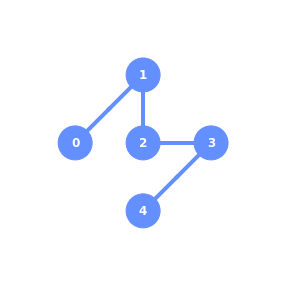

In [12]:
from qiskit.visualization import plot_gate_map
backend = provider.get_backend('ibmq_bogota')
plot_gate_map(backend) 

## Error Map
An error map shows both the node connections of a gate map, in addition to the error rate expected on the backend.

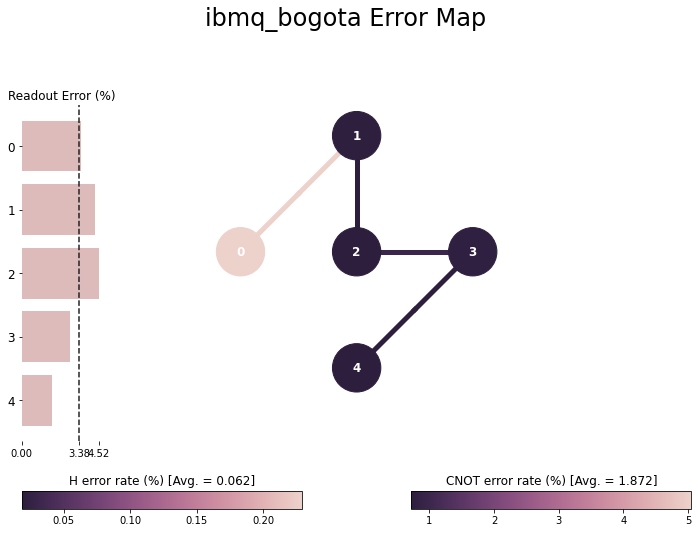

In [13]:
from qiskit.visualization import plot_error_map
plot_error_map(backend) 

## Version Checking

In [8]:
qiskit.__version__

'0.19.1'

In [9]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.1', 'qiskit-aer': '0.10.2', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [16]:
# import qiskit.tools.jupyter
# qiskit_version_table
# qiskit_backend_overview